# Task 6.4 - Supervised Machine Learning: Regression

## This Script Contains:
- Hypthesis
- Importing Libraries and Dataframe
- Data Cleaning
    - Missing Data Checks
    - Duplicate Checks
    - Extreme Value Checks
- Data Prep for Regressional Analysis
- Regression analysis
- Reflections
- Bonus: Additional look

### Hypothesis

I wanted to look at the the offenders age and the number of additional victims as I suspect they have some what of a correlation.

HYPOTHESIS: I suspect as the offenders age goes up so does the number of additional victims until it hits a point around age 45/50 in which it will significantly deacrease back to 0 or 1.

### Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Making it so any graphs will display without the need to call them
%matplotlib inline

In [3]:
# Defining path
path = r'/Users/ColinLynt/Documents/CareerFoundry/01-22 Crime Data Analysis'

In [4]:
# Importing homicide report data
df_hr = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'Homicide_df.pkl'))

In [5]:
# Setting max rows/columns to see 50 rows/columns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

### Data Cleaning

In [6]:
# Checking the df
df_hr.head()

,City,State,Agency,Agentype,Solved,Year,Month,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,VicCount,OffCount
0,"Autauga, AL",Alabama,Autauga County,Sheriff,No,1976,September,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),30.0,Male,Black,Unknown or not reported,31.138045,Unknown,Unknown,Unknown or not reported,Other or type unknown,Relationship not determined,Other,0,0
1,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65.0,Female,Black,Unknown or not reported,62.000000,Male,Black,Unknown or not reported,Other or type unknown,Acquaintance,Brawl due to influence of alcohol,0,0
2,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,March,Normal update,Murder and non-negligent manslaughter,Single victim/multiple offenders,48.0,Male,White,Unknown or not reported,52.000000,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,0,1
3,"Autauga, AL",Alabama,Prattville,Municipal police,Yes,1977,March,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,27.0,Male,Black,Unknown or not reported,22.000000,Female,Black,Unknown or not reported,Shotgun,Husband,Other arguments,0,0
4,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,August,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,17.0,Female,Black,Unknown or not reported,21.000000,Male,Black,Unknown or not reported,Knife or cutting instrument,Acquaintance,Circumstances undetermined,0,0


In [7]:
# Checking the names of the columns
df_hr.columns

Index(['City', 'State', 'Agency', 'Agentype', 'Solved', 'Year', 'Month',
       'ActionType', 'Homicide', 'Situation', 'VicAge', 'VicSex', 'VicRace',
       'VicEthnic', 'OffAge', 'OffSex', 'OffRace', 'OffEthnic', 'Weapon',
       'Relationship', 'Circumstance', 'VicCount', 'OffCount'],
      dtype='object')

In [8]:
# Checking the shape of the df
df_hr.shape

(817709, 23)

### Missing Data

In [9]:
# Checking for missing values
df_hr.isnull().sum()

# No missing values to report

City            0
State           0
Agency          0
Agentype        0
Solved          0
Year            0
Month           0
ActionType      0
Homicide        0
Situation       0
VicAge          0
VicSex          0
VicRace         0
VicEthnic       0
OffAge          0
OffSex          0
OffRace         0
OffEthnic       0
Weapon          0
Relationship    0
Circumstance    0
VicCount        0
OffCount        0
dtype: int64

### Duplicates Check

In [10]:
# Checking for duplicate values
dups = df_hr.duplicated()

In [11]:
dups.shape
# No duplicates to report

(817709,)

### Extreme Value Check

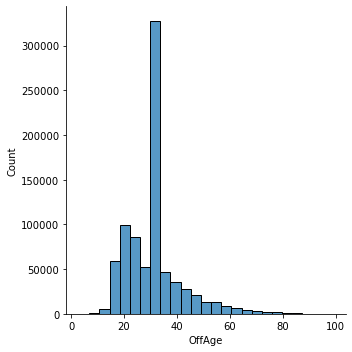

In [14]:
sns.displot(df_hr['OffAge'], bins=25)

In [16]:
# Checking the mean
df_hr['OffAge'].mean()

31.13804532522063

In [17]:
# Checking the median
df_hr['OffAge'].median()

31.138045325057575

In [18]:
# Checking the max
df_hr['OffAge'].max()

99.0

In [19]:
# Checking the min
df_hr['OffAge'].min()

3.0

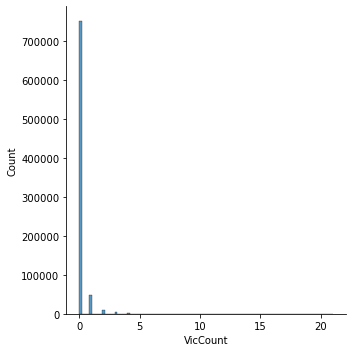

In [33]:
sns.displot(df_hr['VicCount'], bins=100)

## Data Prep for Regressional Analysis

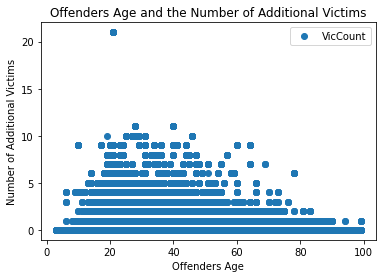

In [21]:
# Creating a scatterplot using matplotlib to see how the variable compare
df_hr.plot(x = 'OffAge', y='VicCount',style='o')
plt.title('Offenders Age and the Number of Additional Victims')  
plt.xlabel('Offenders Age')  
plt.ylabel('Number of Additional Victims')  
plt.show()

In [22]:
# Reshaping the variables into NumPy arrays
X = df_hr['OffAge'].values.reshape(-1,1)
y = df_hr['VicCount'].values.reshape(-1,1)

In [23]:
X

array([[31.13804533],
       [62.        ],
       [52.        ],
       ...,
       [30.        ],
       [30.        ],
       [31.13804533]])

In [24]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [25]:
# Spliting data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression analysis

In [26]:
# Creating a regression object
regression = LinearRegression()

In [27]:
# Fitting the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predicting the values of y using X
y_predicted = regression.predict(X_test)

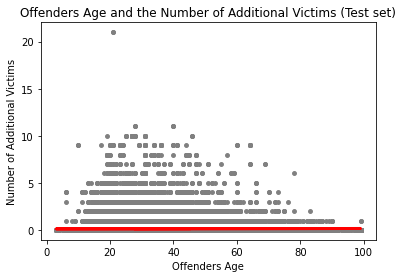

In [29]:
# Creating a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Offenders Age and the Number of Additional Victims (Test set)')
plot_test.xlabel('Offenders Age')
plot_test.ylabel('Number of Additional Victims')
plot_test.show()

In [35]:
# Creating objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [36]:
# Printing the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00042908]]
Mean squared error:  0.27940200357948325
R2 score:  4.529471400960272e-05


In [37]:
y_predicted

array([[0.12912818],
       [0.12397918],
       [0.12318024],
       ...,
       [0.12827001],
       [0.11797201],
       [0.12183376]])

In [38]:
# Creating a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.129128
1,0,0.123979
2,0,0.123180
3,0,0.121834
4,0,0.120117
5,0,0.123180
6,0,0.123180
7,0,0.123180
8,0,0.121405
9,0,0.123180


### Reflections

There was no correlation between the offender's age and the number of additional victims. While I utilized a predictive model, I knew it wasn't going to produce any interesting results as a lot of the data points are too clustered together around 0. For this reason, the predictive model wouldn't work. This data set, unfortunately, wasn't designed for this type of analysis.

That being said, the predictive model wasn't that great, as it centered itself around 0. It wasn't great at being able to predict future events las the events in question were too hard to predict, as it is human nature after all.

So I was curious to see what would happen to the predictive model if I had gotten rid of all the zeros. See below for further information.

### Bonus: Additional look

While it isn't good data practice to delete this many rows, I was curious to see if the zeros were skewing the regression analysis. So I have decided to test this hypothesis and delete all rows in the VicCount column to see how this will affect my regression analysis. 

There are 750874 rows with zero, which is about 94% of my data. As I mentioned before, this is not good data analytics practice.

In [39]:
# Checking what PAPSP8 is
df_hr.loc[df_hr['VicCount'] == 0]

,City,State,Agency,Agentype,Solved,Year,Month,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,VicCount,OffCount
0,"Autauga, AL",Alabama,Autauga County,Sheriff,No,1976,September,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),30.0,Male,Black,Unknown or not reported,31.138045,Unknown,Unknown,Unknown or not reported,Other or type unknown,Relationship not determined,Other,0,0
1,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65.0,Female,Black,Unknown or not reported,62.000000,Male,Black,Unknown or not reported,Other or type unknown,Acquaintance,Brawl due to influence of alcohol,0,0
2,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,March,Normal update,Murder and non-negligent manslaughter,Single victim/multiple offenders,48.0,Male,White,Unknown or not reported,52.000000,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,0,1
3,"Autauga, AL",Alabama,Prattville,Municipal police,Yes,1977,March,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,27.0,Male,Black,Unknown or not reported,22.000000,Female,Black,Unknown or not reported,Shotgun,Husband,Other arguments,0,0
4,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,August,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,17.0,Female,Black,Unknown or not reported,21.000000,Male,Black,Unknown or not reported,Knife or cutting instrument,Acquaintance,Circumstances undetermined,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827214,"Weston, WY",Wyoming,Weston County,Sheriff,Yes,1982,October,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,21.0,Female,White,Not of Hispanic origin,23.000000,Male,White,Not of Hispanic origin,"Personal weapons, includes beating",Girlfriend,Other arguments,0,0
827215,"Weston, WY",Wyoming,Weston County,Sheriff,Yes,1987,January,Normal update,Manslaughter by negligence,Single victim/single offender,2.0,Male,White,Unknown or not reported,24.000000,Female,White,Unknown or not reported,Asphyxiation - includes death by gas,Son,All other manslaughter by negligence,0,0
827216,"Weston, WY",Wyoming,Weston County,Sheriff,Yes,1994,December,Normal update,Manslaughter by negligence,Single victim/single offender,35.0,Female,Asian,Unknown or not reported,30.000000,Male,Asian,Unknown or not reported,Other or type unknown,Acquaintance,All other manslaughter by negligence,0,0
827217,"Weston, WY",Wyoming,Weston County,Sheriff,Yes,2004,May,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,22.0,Female,White,Unknown or not reported,30.000000,Male,White,Unknown or not reported,Other or type unknown,Girlfriend,Other arguments,0,0


In [41]:
# Dropping 0s from VicCount
df_hr.drop(df_hr.loc[df_hr['VicCount'] == 0].index, inplace = True)

In [42]:
df_hr.shape

(66835, 23)

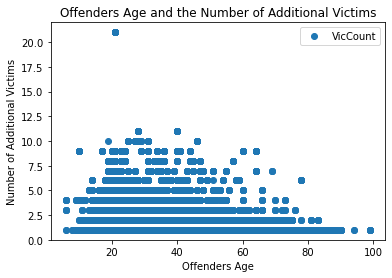

In [43]:
# Creating a scatterplot using matplotlib to see how the variable compare
df_hr.plot(x = 'OffAge', y='VicCount',style='o')
plt.title('Offenders Age and the Number of Additional Victims')  
plt.xlabel('Offenders Age')  
plt.ylabel('Number of Additional Victims')  
plt.show()

In [44]:
# Reshaping the variables into NumPy arrays
X = df_hr['OffAge'].values.reshape(-1,1)
y = df_hr['VicCount'].values.reshape(-1,1)

In [45]:
X

array([[59.],
       [59.],
       [39.],
       ...,
       [27.],
       [27.],
       [27.]])

In [46]:
y

array([[1],
       [1],
       [1],
       ...,
       [2],
       [2],
       [2]])

In [47]:
# Spliting data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
# Creating a regression object
regression = LinearRegression()

In [49]:
# Fitting the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [50]:
# Predicting the values of y using X
y_predicted = regression.predict(X_test)

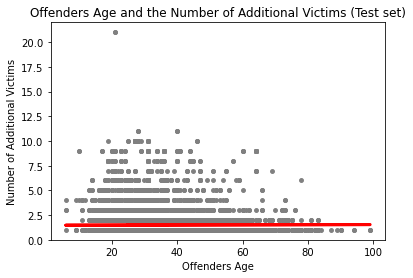

In [51]:
# Creating a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Offenders Age and the Number of Additional Victims (Test set)')
plot_test.xlabel('Offenders Age')
plot_test.ylabel('Number of Additional Victims')
plot_test.show()

In [52]:
# Creating objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [53]:
# Printing the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00065794]]
Mean squared error:  1.4689457696911654
R2 score:  6.273794810318645e-05


In [54]:
y_predicted

array([[1.49844158],
       [1.4945848 ],
       [1.4945848 ],
       ...,
       [1.48857255],
       [1.49712571],
       [1.49054636]])

In [55]:
# Creating a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,1.498442
1,3,1.494585
2,1,1.494585
3,2,1.495152
4,1,1.491862
5,1,1.493836
6,1,1.494585
7,1,1.494585
8,1,1.485941
9,1,1.483967
